In [33]:
#import and read with mne
import mne
import pandas as pd

#read all the data in "/Users/maltelau/Desktop/LaBraM-MMDTU/LaBraM-MMDTU/DTUDATA/FG_Data/PreprocessedEEGData" folder using mne

X301 = mne.read_epochs("/Users/maltelau/Desktop/LaBraM-MMDTU/LaBraM-MMDTU/DTUDATA/FG_Data/PreprocessedEEGData/301A_FG_preprocessed-epo.fif")
X301

Reading /Users/maltelau/Desktop/LaBraM-MMDTU/LaBraM-MMDTU/DTUDATA/FG_Data/PreprocessedEEGData/301A_FG_preprocessed-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    5498.00 ms
        0 CTF compensation matrices available
Not setting metadata
300 matching events found
No baseline correction applied
0 projection items activated


<EpochsFIF | 300 events (all good), -0.5 – 5.498 s (baseline off), ~439.5 MiB, data loaded,
 'T1P': 30
 'T1Pn': 30
 'T3P': 30
 'T3Pn': 30
 'T12P': 30
 'T12Pn': 30
 'T13P': 30
 'T13Pn': 30
 'T23P': 30
 'T23Pn': 30>

    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


/opt/anaconda3/envs/labram/lib/python3.11/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


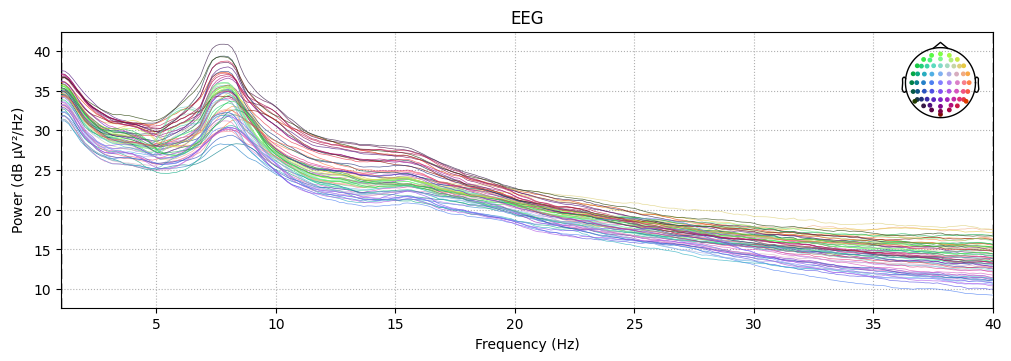

In [39]:
#plot the mne data
spectrum = X301.compute_psd(fmax=40,fmin=1)
spectrum.plot()

Effective window size : 2.000 (s)
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


/opt/anaconda3/envs/labram/lib/python3.11/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


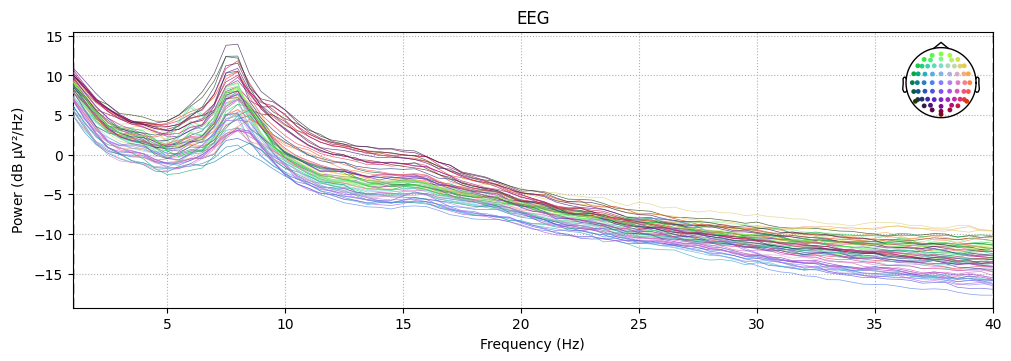

In [47]:
sfreq = X301.info['sfreq']  # Get the sampling frequency
win_length = 1  # Window size in seconds
n_per_seg = int(win_length * sfreq)  # Convert seconds to samples
n_overlap = n_per_seg // 2  # 50% overlap

# Compute Welch's PSD
PSD = X301.compute_psd(
    method='welch',
    n_fft=1000,
    fmin=1,
    fmax=40,
)
# Plot the PSD
PSD.plot()

Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


/opt/anaconda3/envs/labram/lib/python3.11/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


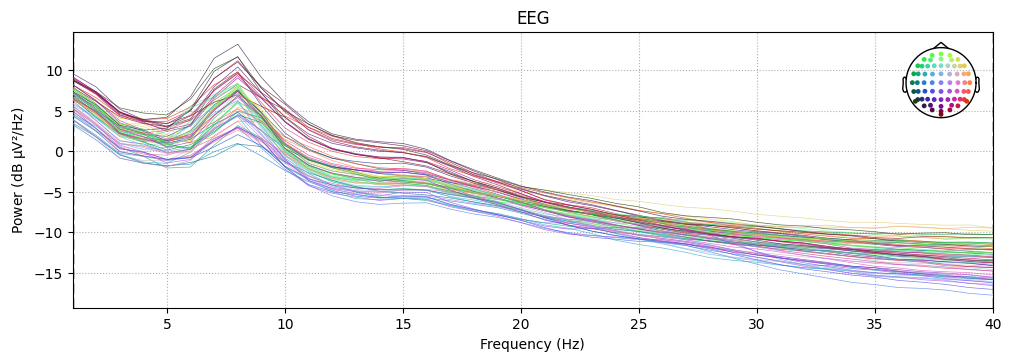

In [ ]:
sfreq = X301.info['sfreq']  # Get the sampling frequency (500 Hz from your data)
win_length = 1  # Window size in seconds
n_per_seg = int(win_length * sfreq)  # Convert seconds to samples
n_overlap = n_per_seg // 2  # 50% overlap

# Compute Welch's PSD
PSD = X301.compute_psd(
    method='welch',
    n_fft=500,
    n_overlap=n_overlap,  # Add this parameter
    n_per_seg=n_per_seg,  # Add this parameter
    fmax=40,
    fmin=1
)
# Plot the PSD
PSD.plot()